# POST PROCESSING NOTEBOOK

This python notebook is used to generate effective plots for the results obtained on an X-capacitive accelerometer, accounting for unknown overecth, offset and thickness.

We will start by training the surrogate modelling, plotting the predictions, and then we will start the identiifcation procedure.

##### Importing Necessary Libraries

In [8]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../../src/SurrogateModeling')
sys.path.append('../../src/utils/')

from model import NN_Model
from training import train
from preprocessing import preprocessing
from postprocessing import *

## First Surrogate Model training

We start training the surrogate model, in order to do so we use the corresponding configuration file. In addition we set some values in order to hide confidential information in the plots.

In [9]:
# CONFIGURATION FILE
CONFIGURATION_FILE = './config_I.json'

mean_overetch = 0.3
mean_offset = 0.0
mean_thickness= 30.0

sigma_O = 0.2
sigma_U = 0.5
sigma_T = 1.0 

We start importing the dataset, through the preprocessing utility. Then we plot the data, subdivided in validation and training sets

ciao


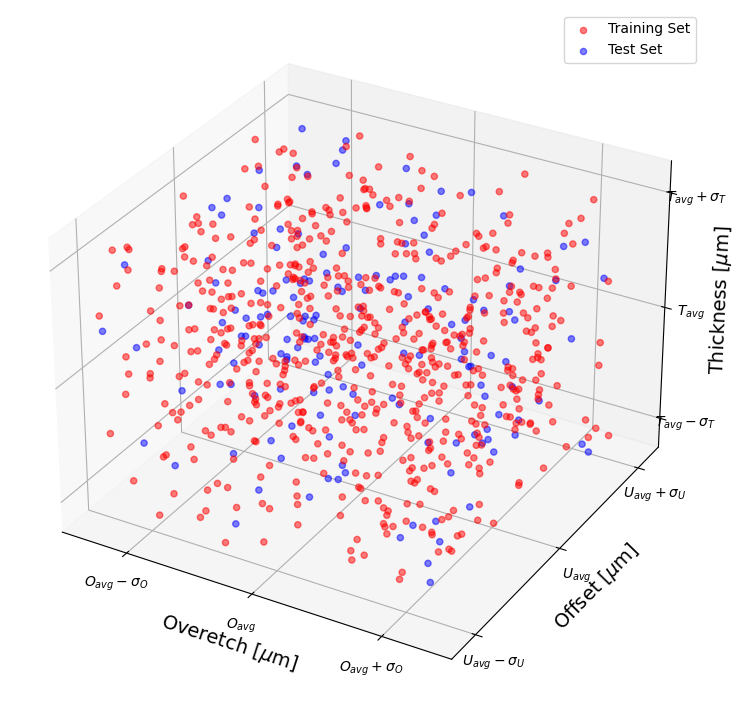

In [10]:
# Preprocessing
data_processor = preprocessing(CONFIGURATION_FILE)

# Collecting traing and Testing Data
X_train = data_processor.X_train
X_test = data_processor.X_test
y_train = data_processor.y_train
y_test = data_processor.y_test

# Time steps of the simulations
time = data_processor.time

# Scaled and processed data
X_train_scaled = data_processor.X_train_scaled
X_test_scaled = data_processor.X_test_scaled 

labels = [
    'Overetch [${\mu}$m]', 
    'Offset [${\mu}$m]', 
    'Thickness [${\mu}$m]'
    ]

ticks = [
    [mean_overetch - sigma_O + 0.05, mean_overetch, mean_overetch + sigma_O - 0.05],
    [mean_offset - sigma_U + 0.05, mean_offset, mean_offset + sigma_U - 0.05],
    [mean_thickness - sigma_T + 0.1, mean_thickness, mean_thickness + sigma_T-0.1]
]

ticks_labels = [
    ['$O_{avg}-\sigma_O$', '$O_{avg}$', '$O_{avg}+\sigma_O$'],
    ['$U_{avg}-\sigma_U$', '$U_{avg}$', '$U_{avg}+\sigma_U$'],
    ['$T_{avg}-\sigma_T$', '$T_{avg}$', '$T_{avg}+\sigma_T$']
]


plot_dataset(X_train, X_test, features_labels=labels, features_ticks=ticks, features_ticks_labels=ticks_labels, digits='%.2f', projection='3d')


### Surrogate Model Training

Then, we train the model. If you want you can use a pretrained model, just changing the flag.

Num GPUs Available:  0
ciao
Epoch 1/1000


2024-03-28 16:47:41.595449: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


40/40 - 0s - loss: 2805.8813 - lr: 0.0010 - 410ms/epoch - 10ms/step
Epoch 2/1000
40/40 - 0s - loss: 2350.8408 - lr: 9.9010e-04 - 137ms/epoch - 3ms/step
Epoch 3/1000
40/40 - 0s - loss: 2148.8606 - lr: 9.8039e-04 - 140ms/epoch - 4ms/step
Epoch 4/1000
40/40 - 0s - loss: 1980.9904 - lr: 9.7087e-04 - 167ms/epoch - 4ms/step
Epoch 5/1000
40/40 - 0s - loss: 1830.3484 - lr: 9.6154e-04 - 308ms/epoch - 8ms/step
Epoch 6/1000
40/40 - 0s - loss: 1694.9707 - lr: 9.5238e-04 - 172ms/epoch - 4ms/step
Epoch 7/1000
40/40 - 0s - loss: 1573.4827 - lr: 9.4340e-04 - 197ms/epoch - 5ms/step
Epoch 8/1000
40/40 - 0s - loss: 1462.1842 - lr: 9.3458e-04 - 174ms/epoch - 4ms/step
Epoch 9/1000
40/40 - 0s - loss: 1362.6635 - lr: 9.2593e-04 - 161ms/epoch - 4ms/step
Epoch 10/1000
40/40 - 0s - loss: 1273.0300 - lr: 9.1743e-04 - 169ms/epoch - 4ms/step
Epoch 11/1000
40/40 - 0s - loss: 1191.6725 - lr: 9.0909e-04 - 170ms/epoch - 4ms/step
Epoch 12/1000
40/40 - 0s - loss: 1117.6538 - lr: 9.0090e-04 - 149ms/epoch - 4ms/step
Epoch

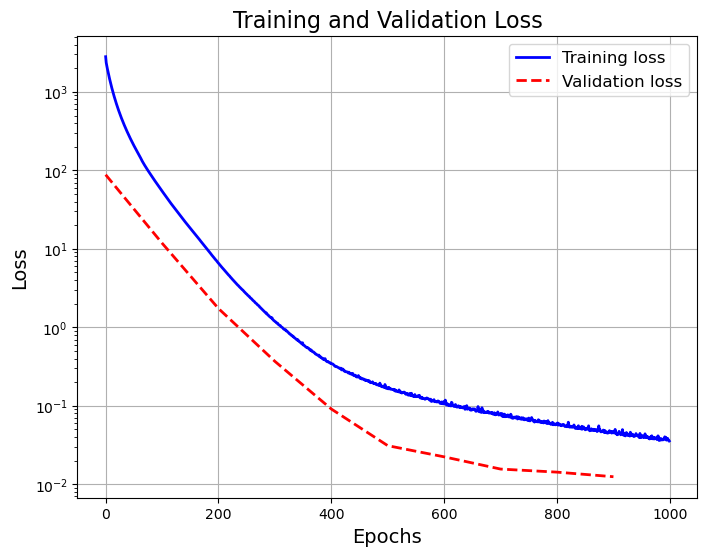

In [11]:
training = True

if training:
    train(CONFIGURATION_FILE)

model_I = NN_Model()
model_I.load_model(data_processor.config['MODEL_PATH'])

### Accuracy

We now plot the predictions of the surrogate model with respect to real validation data.

If the predictions are not accurate enough, enrich model, improve training parameter or increase the number of training epochs.

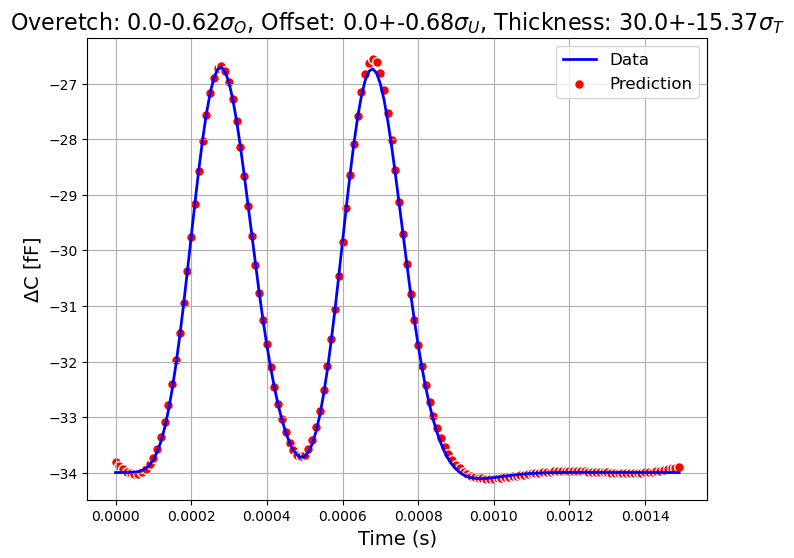

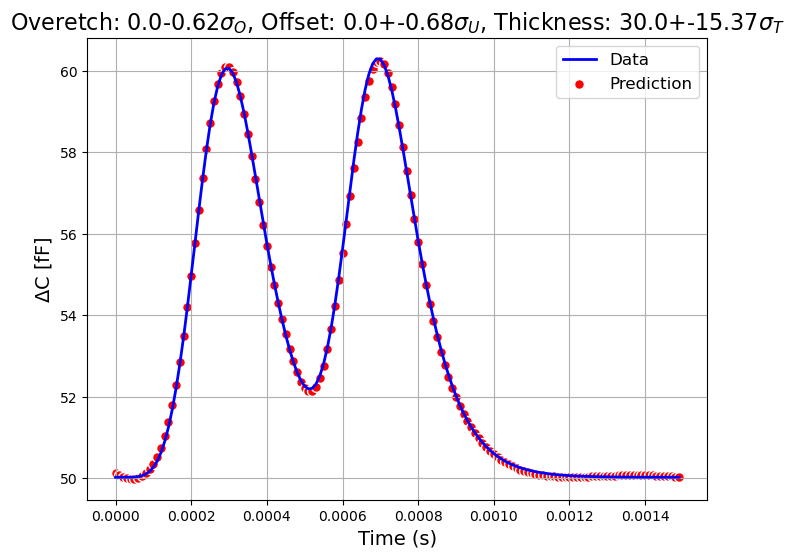

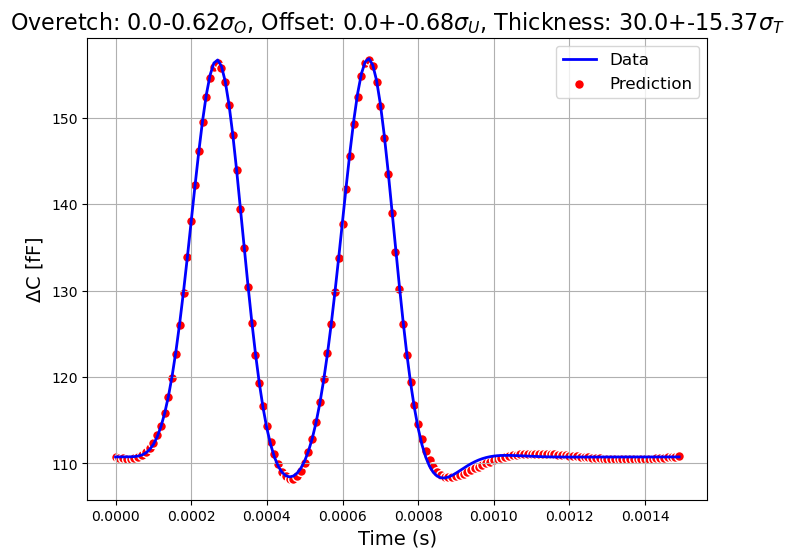

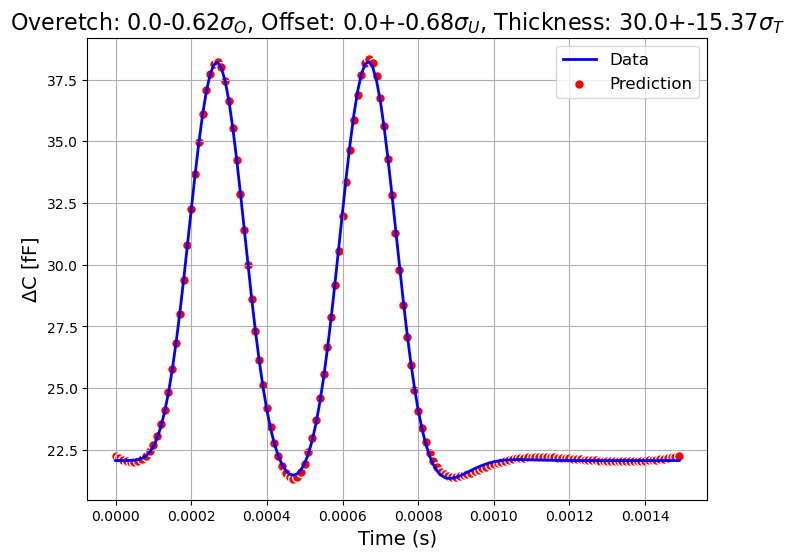

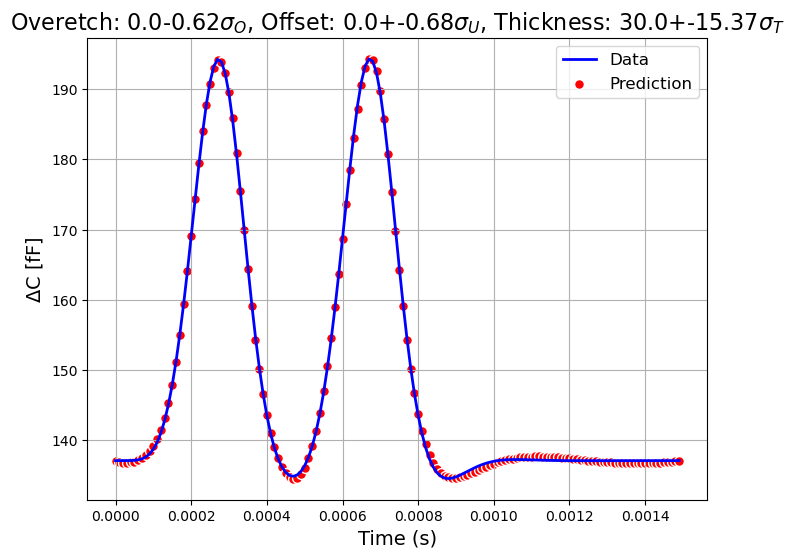

In [12]:
plot_predictions(model_I, y_test, X_test_scaled, time, max_plots=5)


### Second Surrogate Model

We now repeat the training procedure, mivong to the second dataset involving the sensitivity w.r.t. geometric parameters 

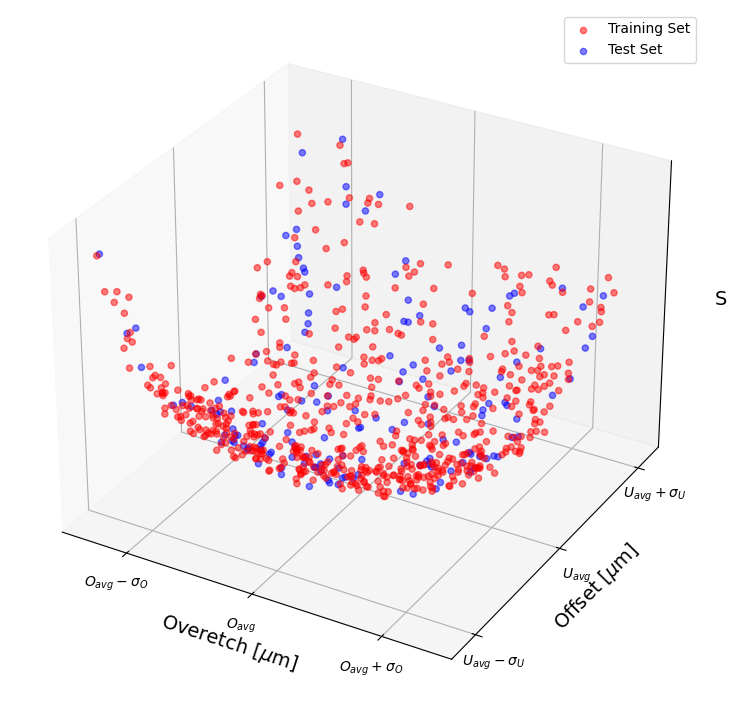

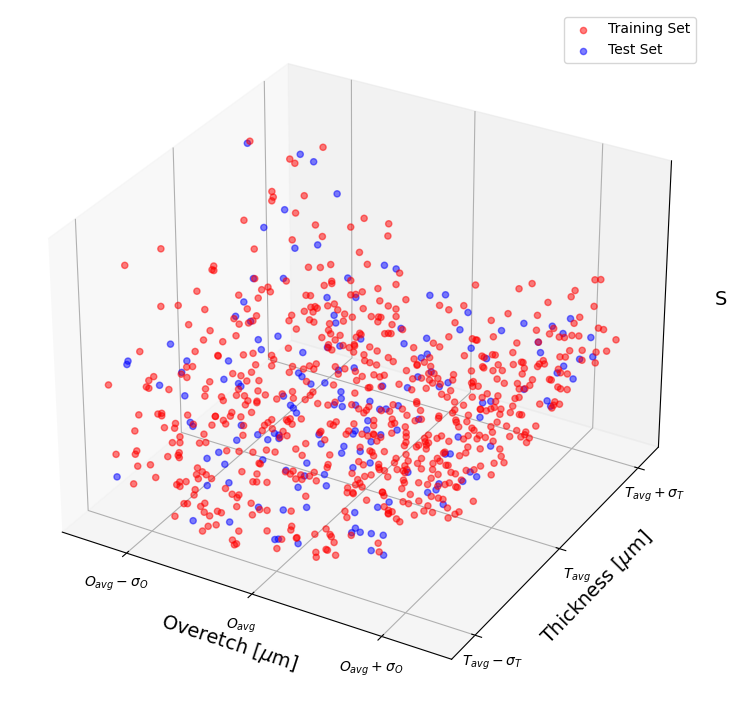

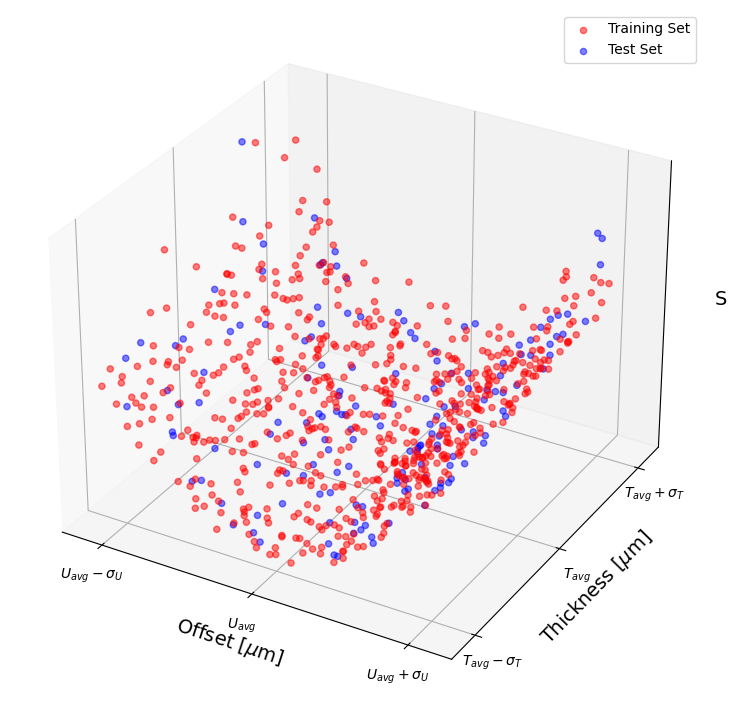

In [13]:
# CONFIGURATION FILE
CONFIGURATION_FILE = './config_II.json'

mean_overetch = 0.3
mean_offset = 0.0
mean_thickness = 30.0
mean_sensitivity = 4.4

sigma_O = 0.2
sigma_U = 0.5
sigma_T = 1.0 

# Preprocessing
data_processor = preprocessing(CONFIGURATION_FILE)

# Collecting traing and Testing Data
X_train = data_processor.X_train
X_test = data_processor.X_test
y_train = data_processor.y_train
y_test = data_processor.y_test

# Scaled and processed data
X_train_scaled = data_processor.X_train_scaled
X_test_scaled = data_processor.X_test_scaled 

labels = [
    'Overetch [${\mu}$m]', 
    'Offset [${\mu}$m]', 
    'Thickness [${\mu}$m]',
    'S'
    ]

ticks = [
    [mean_overetch - sigma_O + 0.05, mean_overetch, mean_overetch + sigma_O - 0.05],
    [mean_offset - sigma_U + 0.05, mean_offset, mean_offset + sigma_U - 0.05],
    [mean_thickness - sigma_T + 0.1, mean_thickness, mean_thickness + sigma_T-0.1],
    [mean_sensitivity]
]

ticks_labels = [
    ['$O_{avg}-\sigma_O$', '$O_{avg}$', '$O_{avg}+\sigma_O$'],
    ['$U_{avg}-\sigma_U$', '$U_{avg}$', '$U_{avg}+\sigma_U$'],
    ['$T_{avg}-\sigma_T$', '$T_{avg}$', '$T_{avg}+\sigma_T$'],
    ['$S_{avg}$']
]

plot_sensitivity_dataset(X_train, X_test, y_train, y_test, [0, 1, 3], mean_sensitivity,
                         labels, ticks, ticks_labels)

plot_sensitivity_dataset(X_train, X_test, y_train, y_test, [0, 2, 3], mean_sensitivity,
                         labels, ticks, ticks_labels)

plot_sensitivity_dataset(X_train, X_test, y_train, y_test, [1, 2, 3], mean_sensitivity,
                         labels, ticks, ticks_labels)


Num GPUs Available:  0
Epoch 1/1000
32/32 - 0s - loss: 20.8583 - lr: 0.0010 - 172ms/epoch - 5ms/step
Epoch 2/1000
32/32 - 0s - loss: 5.3777 - lr: 9.9010e-04 - 13ms/epoch - 398us/step
Epoch 3/1000
32/32 - 0s - loss: 0.4633 - lr: 9.8039e-04 - 13ms/epoch - 401us/step
Epoch 4/1000
32/32 - 0s - loss: 0.3535 - lr: 9.7087e-04 - 13ms/epoch - 422us/step
Epoch 5/1000
32/32 - 0s - loss: 0.3370 - lr: 9.6154e-04 - 14ms/epoch - 431us/step
Epoch 6/1000
32/32 - 0s - loss: 0.3171 - lr: 9.5238e-04 - 13ms/epoch - 420us/step
Epoch 7/1000
32/32 - 0s - loss: 0.3089 - lr: 9.4340e-04 - 13ms/epoch - 410us/step
Epoch 8/1000
32/32 - 0s - loss: 0.3060 - lr: 9.3458e-04 - 13ms/epoch - 417us/step
Epoch 9/1000
32/32 - 0s - loss: 0.2962 - lr: 9.2593e-04 - 13ms/epoch - 408us/step
Epoch 10/1000
32/32 - 0s - loss: 0.2878 - lr: 9.1743e-04 - 13ms/epoch - 400us/step
Epoch 11/1000
32/32 - 0s - loss: 0.2779 - lr: 9.0909e-04 - 13ms/epoch - 403us/step
Epoch 12/1000
32/32 - 0s - loss: 0.2770 - lr: 9.0090e-04 - 14ms/epoch - 423us

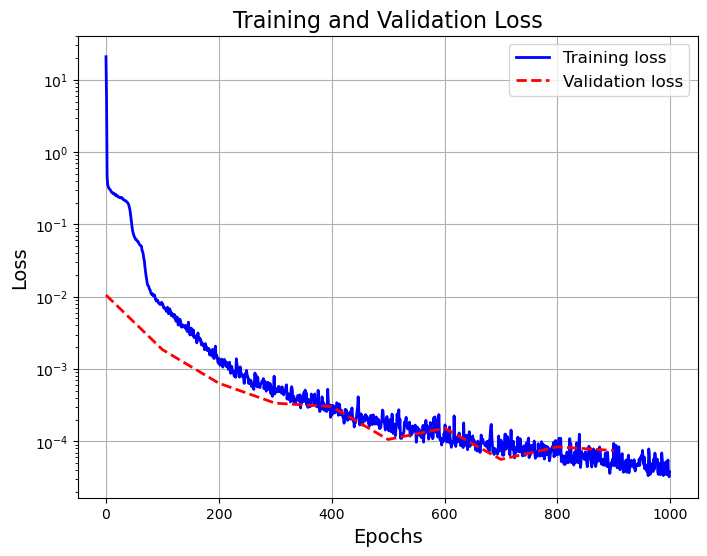

In [14]:
training = True

if training:
    train(CONFIGURATION_FILE)

model_II = NN_Model()
model_II.load_model(data_processor.config['MODEL_PATH'])

#### Accuracy

We now test again the accuracy of the model among training and validation data

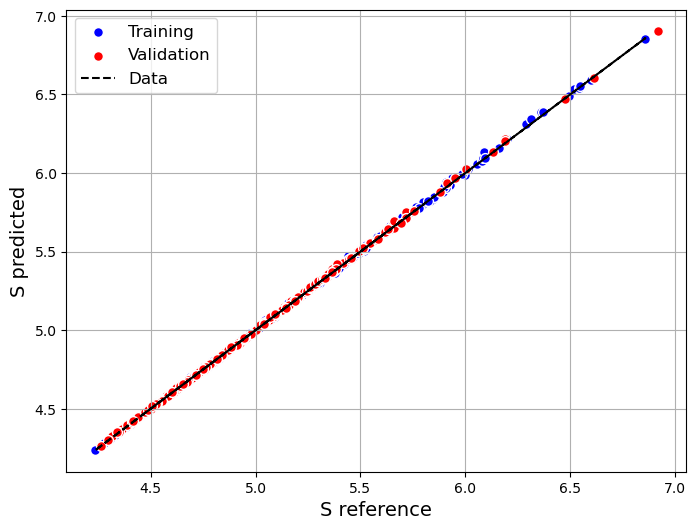

In [15]:
plot_correlation_sensitivity(model_II, X_train_scaled, X_test_scaled, y_train, y_test)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, BoundaryNorm
from matplotlib.cm import ScalarMappable

model = model_I
# Test values


# Prepare the meshgrid for overetch, offset, and thickness
oe, off, th = np.meshgrid(overetch_test, offset_test, thickness_test, indexing='ij')

# Flatten the arrays and combine into a single array for model input
test_data = np.column_stack((oe.flatten(), off.flatten(), th.flatten()))
test_data = np.repeat(test_data,len(time),axis=0)
time_data = np.tile(time,15)
test_data = np.column_stack((test_data,time_data)) 

# Assuming 'data_processor' can scale this test_data and 'model' can predict it
scaled_test_data = data_processor.scaler.transform(test_data)
predictions = model.predict(scaled_test_data)

plt.figure(figsize=(9, 6))
ax = plt.gca()
ax.set_xlabel('Time [ms]', fontsize=14)
ax.set_ylabel(r'${\Delta}C$ [fF]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Define colormap for 'overetch' values and marker styles for 'offset' values
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, 5)]
print(colors)
norm = Normalize(vmin=overetch_test.min(), vmax=overetch_test.max())
sm = ScalarMappable(norm=norm, cmap=cmap)
marker_styles = ['o', 's', 'D']  # Example marker styles for different offsets
print(test_data)

# Define levels for 'overetch' values and create a norm based on these levels
levels = np.linspace(overetch_test.min(), overetch_test.max(), 6)
norm = BoundaryNorm(levels, ncolors=cmap.N)
off_labels = [r'$U_{avg}-0.1\sigma_U$',r'$U_{avg}$',r'$U_{avg}+0.1\sigma_U$']
print(levels)

# Plot each line with color and marker based on 'overetch' and 'offset' values
for i, (oe_val, off_val, _, _) in enumerate(test_data[0:-1:150,:]):
    color = sm.to_rgba(oe_val)
    marker = marker_styles[i % len(marker_styles)]
    l = off_labels[i % len(marker_styles)] 
    plt.plot(1e3*time_data.reshape(15, 150)[i], predictions.reshape(15, 150)[i], 
            color=color, marker=marker, markevery=10, label=l)

# Reduce the number of legend entries by creating custom labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=10, labelcolor='black')

# Adjust the colorbar
sm = ScalarMappable(norm=norm, cmap=cmap)
cbar = plt.colorbar(sm, ax=ax, ticks=[levels[0], (levels[2]+levels[3])*0.5, levels[-1]])  # Ticks at min and max
cbar.set_label('Overetch', fontsize=14)

# Set tick labels to show only the min and max values
cbar.set_ticklabels([r'$O_{avg}-\sigma_O$', r'$O_{avg}$', r'$O_{avg}+\sigma_O$'])

plt.grid(True)
plt.tight_layout()
plt.show()

#         # Test values


# # Prepare the meshgrid for overetch, offset, and thickness
# oe, off, th = np.meshgrid(overetch_test, offset_test, thickness_test, indexing='ij')

# # Flatten the arrays and combine into a single array for model input
# test_data = np.column_stack((oe.flatten(), off.flatten(), th.flatten()))
# test_data = np.repeat(test_data,len(time),axis=0)
# time_data = np.tile(time,25)
# test_data = np.column_stack((test_data,time_data)) 

# # Assuming 'data_processor' can scale this test_data and 'model' can predict it
# scaled_test_data = data_processor.scaler.transform(test_data)
# predictions = model.predict(scaled_test_data)

# plt.figure(figsize=(9, 6))
# ax = plt.gca()
# ax.set_xlabel('Time [ms]', fontsize=14)
# ax.set_ylabel(r'${\Delta}C$ [fF]', fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# # Define colormap for 'overetch' values and marker styles for 'offset' values
# cmap = plt.get_cmap('jet')
# colors = [cmap(i) for i in np.linspace(0, 1, 5)]
# print(colors)
# norm = Normalize(vmin=overetch_test.min(), vmax=overetch_test.max())
# sm = ScalarMappable(norm=norm, cmap=cmap)
# marker_styles = ['o', 's', 'D', 'x', '*']  # Example marker styles for different offsets
# # print(test_data)

# # Define levels for 'overetch' values and create a norm based on these levels
# levels = np.linspace(thickness_test.min(), thickness_test.max(), 6)
# norm = BoundaryNorm(levels, ncolors=cmap.N)
# off_labels = [r'$O_{avg}-\sigma_O$',r'$O_{avg}-0.5\sigma_O$',r'$O_{avg}$',r'$O_{avg}+0.5\sigma_O$',r'$O_{avg}+\sigma_O$']
# print(levels)

# # Plot each line with color and marker based on 'overetch' and 'offset' values
# for i, (oe_val, _, th_val, _) in enumerate(test_data[0:-1:150,:]):
#     print(th_val)
#     color = colors[i%len(colors)]
#     print(color)
#     marker = marker_styles[int(i/5) % len(marker_styles)]
#     l = off_labels[int(i/5) % len(marker_styles)] 
#     plt.plot(1e3*time_data.reshape(25, 150)[i], predictions.reshape(25, 150)[i], '-', color=color,
#                 marker=marker, markevery=10, label=l)

# # Reduce the number of legend entries by creating custom labels
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys(), fontsize=10, labelcolor='black')

# # Adjust the colorbar
# sm = ScalarMappable(norm=norm, cmap=cmap)
# cbar = plt.colorbar(sm, ax=ax, ticks=[levels[0], 0.5*(levels[2]+levels[3]), levels[-1]])  # Ticks at min and max
# cbar.set_label('Thickness', fontsize=14)

# # Set tick labels to show only the min and max values
# cbar.set_ticklabels([r'$T_{avg}-\sigma_T$', r'$T_{avg}$', r'$T_{avg}+\sigma_T$'])


# plt.grid(True)
# plt.tight_layout()
# plt.show()

NameError: name 'overetch_test' is not defined